In [2]:
%matplotlib inline


# Shot freeze frame

This example shows how to plot a shot freeze frame.


In [3]:
import matplotlib.pyplot as plt

from mplsoccer import VerticalPitch, FontManager, Sbopen

plt.style.use('ggplot')

# get event and lineup dataframes for game 3857283
# event data
parser = Sbopen()
df_event, df_related, df_freeze, df_tactics = parser.event(3857283)

# lineup data
df_lineup = parser.lineup(7478)
df_lineup = df_lineup[['player_id', 'jersey_number', 'team_name']].copy()

Subset a shot



In [4]:
SHOT_ID = '24ff4125-033c-46d4-aa49-789349881943'    #first goal
# SHOT_ID= 'fd96509c-06be-4f53-b0d1-a3afd34aa9dd' #second goal
df_freeze_frame = df_freeze[df_freeze.id == SHOT_ID].copy()
df_shot_event = df_event[df_event.id == SHOT_ID].dropna(axis=1, how='all').copy()

# add the jersey number
df_freeze_frame = df_freeze_frame.merge(df_lineup, how='left', on='player_id')

Subset the teams



In [5]:
# strings for team names
team1 = df_shot_event.team_name.iloc[0]
team2 = list(set(df_event.team_name.unique()) - {team1})[0]

# subset the team shooting, and the opposition (goalkeeper/ other)
df_team1 = df_freeze_frame[df_freeze_frame.team_name == team1]
df_team2_goal = df_freeze_frame[(df_freeze_frame.team_name == team2) &
                                (df_freeze_frame.position_name == 'Goalkeeper')]
df_team2_other = df_freeze_frame[(df_freeze_frame.team_name == team2) &
                                 (df_freeze_frame.position_name != 'Goalkeeper')]

Plotting



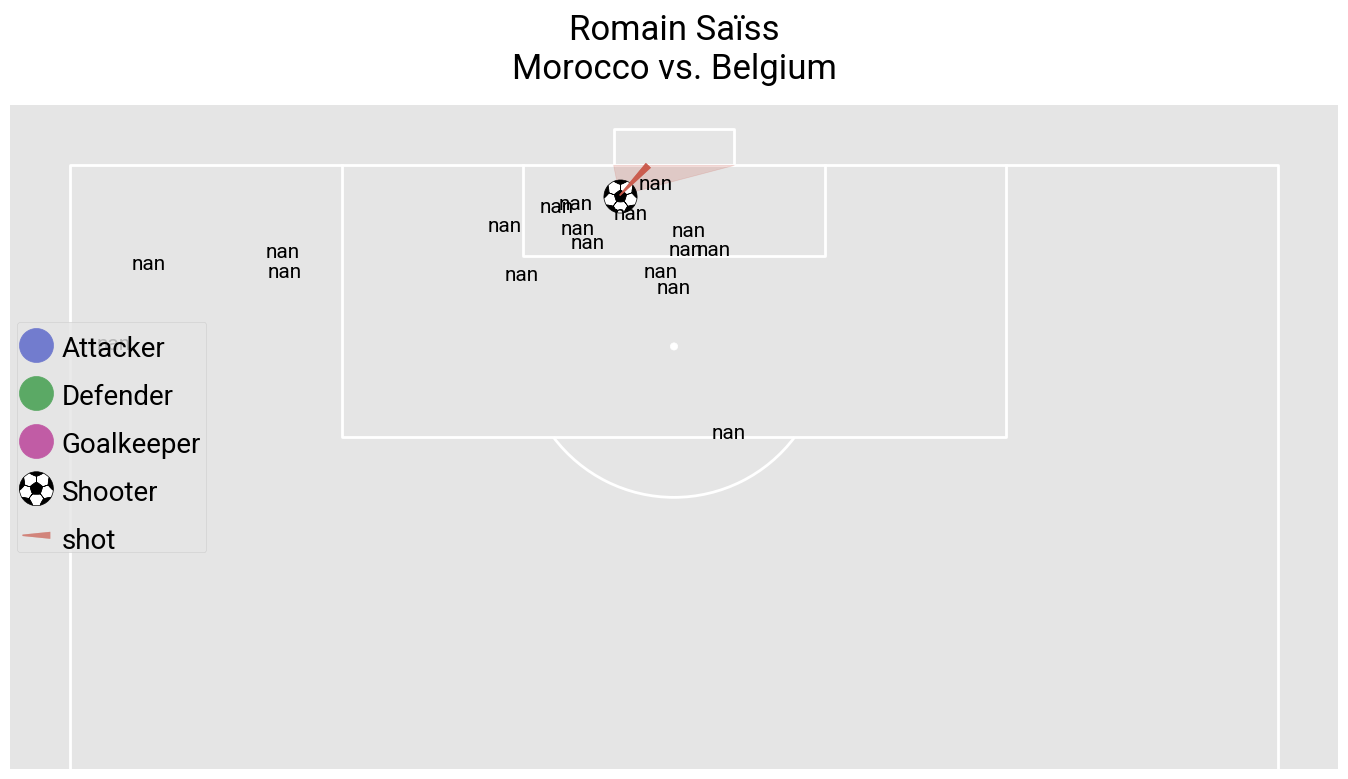

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
Name: jersey_number, dtype: float64


In [9]:
# Setup the pitch
pitch = VerticalPitch(half=True, goal_type='box', pad_bottom=-20)

# We will use mplsoccer's grid function to plot a pitch with a title axis.
fig, axs = pitch.grid(figheight=8, endnote_height=0,  # no endnote
                      title_height=0.1, title_space=0.02,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.83)

# Plot the players
sc1 = pitch.scatter(df_team1.x, df_team1.y, s=600, color='#727cce', label='Attacker', ax=axs['pitch'])
sc2 = pitch.scatter(df_team2_other.x, df_team2_other.y, s=600,
                    c='#5ba965', label='Defender', ax=axs['pitch'])
sc4 = pitch.scatter(df_team2_goal.x, df_team2_goal.y, s=600,
                    ax=axs['pitch'], c='#c15ca5', label='Goalkeeper')

# plot the shot
sc3 = pitch.scatter(df_shot_event.x, df_shot_event.y, marker='football',
                    s=600, ax=axs['pitch'], label='Shooter', zorder=1.2)
line = pitch.lines(df_shot_event.x, df_shot_event.y,
                   df_shot_event.end_x, df_shot_event.end_y, comet=True,
                   label='shot', color='#cb5a4c', ax=axs['pitch'])

# plot the angle to the goal
pitch.goal_angle(df_shot_event.x, df_shot_event.y, ax=axs['pitch'], alpha=0.2, zorder=1.1,
                 color='#cb5a4c', goal='right')

# fontmanager for google font (robotto)
robotto_regular = FontManager()

# plot the jersey numbers
for i, label in enumerate(df_freeze_frame.jersey_number):
    pitch.annotate(label, (df_freeze_frame.x[i], df_freeze_frame.y[i]),
                   va='center', ha='center', color='black',
                   fontproperties=robotto_regular.prop, fontsize=15, ax=axs['pitch'])

# add a legend and title
legend = axs['pitch'].legend(loc='center left', labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontproperties(robotto_regular.prop)
    text.set_fontsize(20)
    text.set_va('center')

# title
axs['title'].text(0.5, 0.5, f'{df_shot_event.player_name.iloc[0]}\n{team1} vs. {team2}',
                  va='center', ha='center', color='black',
                  fontproperties=robotto_regular.prop, fontsize=25)

plt.show()  # If you are using a Jupyter notebook you do not need this line

print(df_freeze_frame.jersey_number)